# Analysis of terror data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! pip install ppscore

In [2]:
import ppscore as pps

In [3]:
gt1 = pd.read_csv("tab_gts1.csv")

In [4]:
gt1.head()

,iyear,imonth,iday,country_txt,success,suicide,attacktype1_txt,targtype1_txt,natlty1_txt,gname,weaptype1_txt,nkill,nwound,ishostkid
0,1970,7,2,Dominican Republic,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Unknown,1.0,0.0,0.0
1,1970,1,1,Mexico,1,0,Hostage Taking,Diplomats,Belgium,23rd of September Communist League,Unknown,0.0,0.0,1.0
2,1970,1,1,Philippines,1,0,Assassination,Journalists & Media,United States,Unknown,Unknown,1.0,0.0,0.0
3,1970,1,1,United States,1,0,Armed Assault,Police,United States,Black Nationalists,Firearms,0.0,0.0,0.0
4,1970,1,2,Uruguay,0,0,Assassination,Police,Uruguay,Tupamaros (Uruguay),Firearms,0.0,0.0,0.0


In [5]:
gt1.rename(columns={"iyear":"year", 'country_txt':'Country', "attacktype1_txt": "method", "targtype1_txt": "target", "natity1_txt": "tar_nationality", "weaptype1_txt": "weapon"}, inplace=True)

In [6]:
gt1.head()

,year,imonth,iday,Country,success,suicide,method,target,natlty1_txt,gname,weapon,nkill,nwound,ishostkid
0,1970,7,2,Dominican Republic,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Unknown,1.0,0.0,0.0
1,1970,1,1,Mexico,1,0,Hostage Taking,Diplomats,Belgium,23rd of September Communist League,Unknown,0.0,0.0,1.0
2,1970,1,1,Philippines,1,0,Assassination,Journalists & Media,United States,Unknown,Unknown,1.0,0.0,0.0
3,1970,1,1,United States,1,0,Armed Assault,Police,United States,Black Nationalists,Firearms,0.0,0.0,0.0
4,1970,1,2,Uruguay,0,0,Assassination,Police,Uruguay,Tupamaros (Uruguay),Firearms,0.0,0.0,0.0


In [7]:
gt_sub1 = gt1[["Country", "success", "suicide", "method", "target", "natlty1_txt", "gname", "weapon", "nkill", "nwound", "ishostkid"]]

In [8]:
gt_sub1.head(20)

,Country,success,suicide,method,target,natlty1_txt,gname,weapon,nkill,nwound,ishostkid
0,Dominican Republic,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Unknown,1.0,0.0,0.0
1,Mexico,1,0,Hostage Taking,Diplomats,Belgium,23rd of September Communist League,Unknown,0.0,0.0,1.0
2,Philippines,1,0,Assassination,Journalists & Media,United States,Unknown,Unknown,1.0,0.0,0.0
3,United States,1,0,Armed Assault,Police,United States,Black Nationalists,Firearms,0.0,0.0,0.0
4,Uruguay,0,0,Assassination,Police,Uruguay,Tupamaros (Uruguay),Firearms,0.0,0.0,0.0
5,United States,1,0,Explosives,Utilities,United States,Unknown,Explosives,0.0,0.0,0.0
6,United States,1,0,Infrastructure Attack,Military,United States,New Year's Gang,Incendiary,0.0,0.0,0.0
7,United States,1,0,Infrastructure Attack,Government,United States,New Year's Gang,Incendiary,0.0,0.0,0.0
8,United States,0,0,Explosives,Military,United States,"Weather Underground, Weathermen",Explosives,0.0,0.0,0.0
9,United States,1,0,Infrastructure Attack,Military,United States,Left-Wing Militants,Incendiary,0.0,0.0,0.0


## Correlation matrix

In [9]:
gt_sub1.corr()

,success,suicide,nkill,nwound,ishostkid
success,1.000000,-0.014423,0.059285,0.026369,0.077424
suicide,-0.014423,1.000000,0.148076,0.105647,-0.041860
nkill,0.059285,0.148076,1.000000,0.538133,0.011630
nwound,0.026369,0.105647,0.538133,1.000000,-0.004132
ishostkid,0.077424,-0.041860,0.011630,-0.004132,1.000000


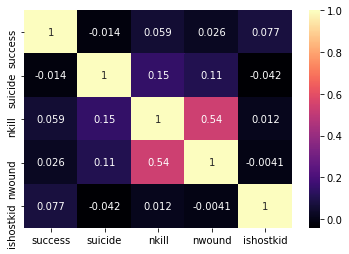

In [10]:
sns.heatmap(gt_sub1.corr(), cmap="magma", annot = True)
plt.show()

In [11]:
gt_sub2 = gt1[["Country","success", "suicide", "method", "target", "gname", "weapon", "nkill", "year", "nwound", "ishostkid"]]

In [12]:
ps_mat =pps.matrix(gt_sub2)

C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Vladi\anaconda3\lib\site-packages\s

In [13]:
ps_mat

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Country,Country,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Country,success,0.000000,regression,True,mean absolute error,0.108200,0.184010,DecisionTreeRegressor()
2,Country,suicide,0.000000,regression,True,mean absolute error,0.037800,0.068644,DecisionTreeRegressor()
3,Country,method,0.135251,classification,True,weighted F1,0.323382,0.414895,DecisionTreeClassifier()
4,Country,target,0.074458,classification,True,weighted F1,0.138000,0.202183,DecisionTreeClassifier()
...,...,...,...,...,...,...,...,...,...
116,ishostkid,weapon,0.063215,classification,True,weighted F1,0.381600,0.420692,DecisionTreeClassifier()
117,ishostkid,nkill,0.000000,regression,True,mean absolute error,2.175000,2.718252,DecisionTreeRegressor()
118,ishostkid,year,0.000000,regression,True,mean absolute error,10.599800,11.221515,DecisionTreeRegressor()
119,ishostkid,nwound,0.000000,regression,True,mean absolute error,3.267000,4.511670,DecisionTreeRegressor()


In [14]:
matpps_small = ps_mat #.loc[ps_mat.ppscore > 0.01]

In [15]:
matpps_small.head(70)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Country,Country,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Country,success,0.000000,regression,True,mean absolute error,0.108200,0.184010,DecisionTreeRegressor()
2,Country,suicide,0.000000,regression,True,mean absolute error,0.037800,0.068644,DecisionTreeRegressor()
3,Country,method,0.135251,classification,True,weighted F1,0.323382,0.414895,DecisionTreeClassifier()
4,Country,target,0.074458,classification,True,weighted F1,0.138000,0.202183,DecisionTreeClassifier()
...,...,...,...,...,...,...,...,...,...
65,gname,ishostkid,0.000000,regression,True,mean absolute error,0.059400,0.102856,DecisionTreeRegressor()
66,weapon,Country,0.017560,classification,True,weighted F1,0.052200,0.068843,DecisionTreeClassifier()
67,weapon,success,0.000000,regression,True,mean absolute error,0.108200,0.189972,DecisionTreeRegressor()
68,weapon,suicide,0.000000,regression,True,mean absolute error,0.037800,0.070095,DecisionTreeRegressor()


## Predictive power score

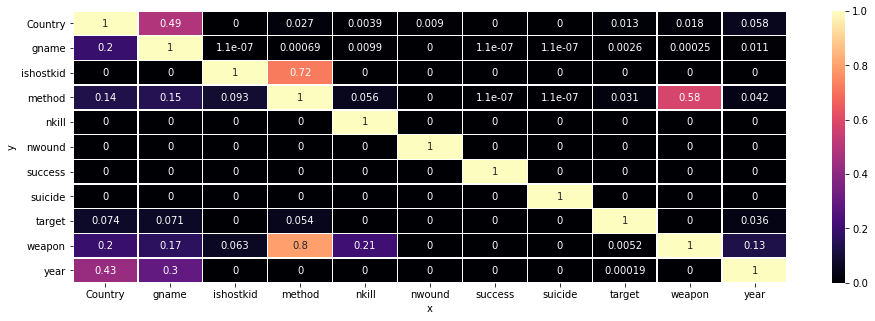

In [16]:
matrix_pps = matpps_small[['x','y','ppscore']].pivot(columns='x',index='y', values='ppscore')

plt.figure(figsize = (16,5))
sns.heatmap(matrix_pps, vmin=0, vmax=1, cmap="magma",linewidths=0.5,annot=True)
plt.show()

#### Predictions from PPS
- A choice of weapon predicts the method of terror attack and a chosen method even stronger predicts the used weapon
- A choice of method predicts whether hostages will be taken, but not other way around
- A number of killed predicts a chosen weapon but not other way around
- A chosen target is poor predictor of the used method
- A choice of the terror group predicts a country they operate, weapon and method they will use. And a group has association with the year, groups are emerging and disappearing.
- An attacked Country was a predictor for attack year, weapon of choice, method of attack and terror group.

In [17]:
suicide_year = gt1.groupby(["year"]).suicide.sum()
suicide_year = suicide_year.fillna(0)

suicide_year

year
1970      0
1971      0
1972      0
1973      0
1974      0
1975      0
1976      0
1977      0
1978      0
1979      0
1980      0
1981      1
1982      0
1983      3
1984      2
1985     13
1986      3
1987      3
1988      2
1989      3
1990      2
1991      3
1992      2
1994     10
1995     21
1996     15
1997      9
1998     18
1999     23
2000     33
2001     49
2002     73
2003     76
2004    108
2005    193
2006    171
2007    343
2008    234
2009    173
2010    164
2011    198
2012    364
2013    595
2014    648
2015    748
2016    817
Name: suicide, dtype: int64

## Suicide style of attacks

In [18]:
suicide_year = suicide_year.to_frame()
suicide_year.head()

,suicide
year,
1970,0
1971,0
1972,0
1973,0
1974,0


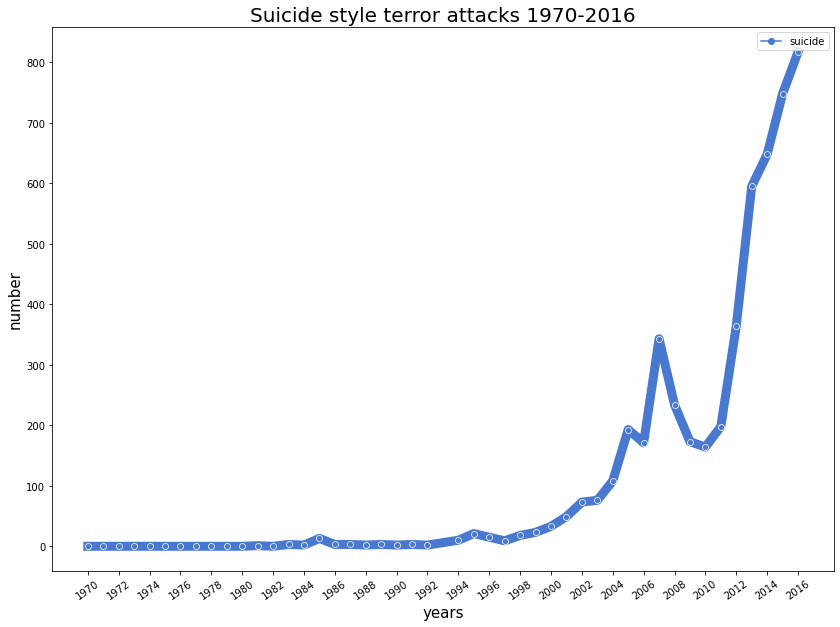

In [19]:
plt.figure(figsize =(14,10))
sns.lineplot(data = suicide_year, markers=True, palette="muted", dashes=False, linewidth=9)
plt.title("Suicide style terror attacks 1970-2016", fontsize = 20)
plt.xlabel("years", fontsize=15)
plt.xticks(np.arange(1970, 2018, step=2), rotation=35)
plt.ylabel("number", fontsize= 15)
plt.show()

In [20]:
att_year = gt1.groupby(["year"]).year.count()
att_year = att_year.fillna(0)

att_year

year
1970      562
1971      303
1972      153
1973      224
1974      279
1975      353
1976      532
1977      915
1978     1122
1979     1861
1980     1893
1981     1738
1982     1472
1983     1641
1984     2288
1985     1890
1986     1953
1987     2290
1988     3149
1989     3612
1990     3154
1991     3695
1992     4385
1994     2834
1995     2358
1996     2361
1997     2495
1998      727
1999     1217
2000     1530
2001     1717
2002     1175
2003     1093
2004     1013
2005     1805
2006     2441
2007     2854
2008     4442
2009     4415
2010     4513
2011     4690
2012     7620
2013    10560
2014    13417
2015    12055
2016    10762
Name: year, dtype: int64

In [21]:
att_year = att_year.to_frame()
att_year.head()

,year
year,
1970,562
1971,303
1972,153
1973,224
1974,279


In [22]:
att_year.rename(columns={"year":"attack", }, inplace=True)

In [23]:
att_year.head()

,attack
year,
1970,562
1971,303
1972,153
1973,224
1974,279


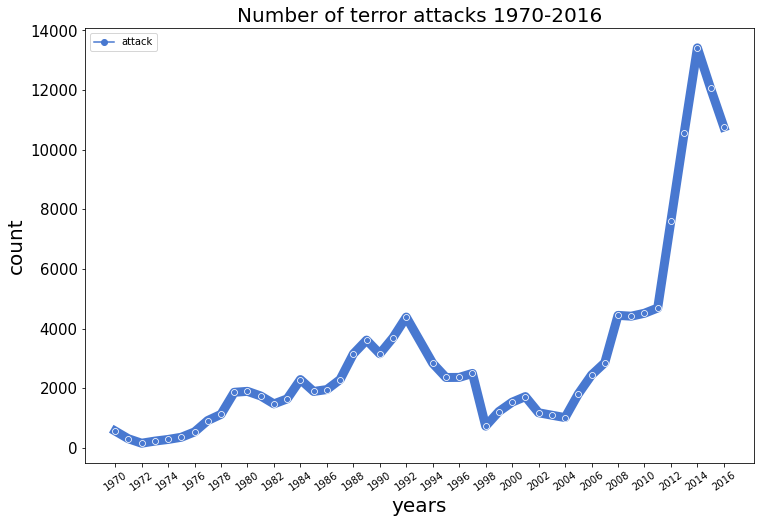

In [141]:
plt.figure(figsize =(12,8))
sns.lineplot(data = att_year, markers=True, palette="muted", dashes=False, linewidth=9)
plt.title("Number of terror attacks 1970-2016", fontsize = 20)
plt.xlabel("years", fontsize=20)
plt.xticks(np.arange(1970, 2018, step=2), rotation=35)
plt.yticks(fontsize = 15)
plt.ylabel("count", fontsize= 20)
plt.show()

In [25]:
suicide_att = pd.merge(suicide_year, att_year, on = "year")

In [26]:
suicide_att.head()

,suicide,attack
year,,
1970,0,562
1971,0,303
1972,0,153
1973,0,224
1974,0,279


In [27]:
suicide_att["Ratio_suicide_att"] = (suicide_att["suicide"]/ suicide_att["attack"])

In [28]:
suicide_att.head()

,suicide,attack,Ratio_suicide_att
year,,,
1970,0,562,0.0
1971,0,303,0.0
1972,0,153,0.0
1973,0,224,0.0
1974,0,279,0.0


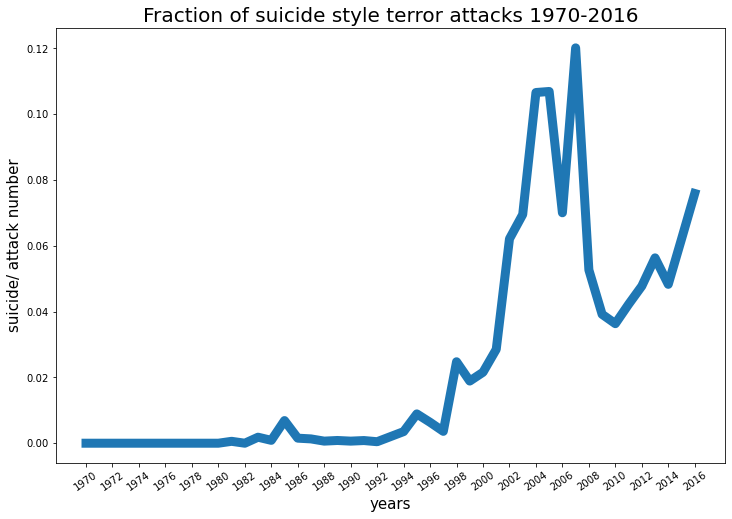

In [109]:
plt.figure(figsize =(12,8))
sns.lineplot(data = suicide_att["Ratio_suicide_att"], markers=True, palette="muted", dashes=False, linewidth=9)
plt.title("Fraction of suicide style terror attacks 1970-2016", fontsize = 20)
plt.xlabel("years", fontsize=15)
plt.xticks(np.arange(1970, 2018, step=2), rotation=35)
plt.ylabel("suicide/ attack number", fontsize= 15)
plt.show()

## Purpose of attack to kill people or take them as hostages in exchange for demands satisfaction

In [30]:
nkill_year = gt1.groupby(["year"]).nkill.sum()
nkill_year = nkill_year.fillna(0)

nkill_year

year
1970      152.0
1971       37.0
1972      193.0
1973      118.0
1974      262.0
1975      194.0
1976      395.0
1977      358.0
1978     1153.0
1979     1857.0
1980     3812.0
1981     4748.0
1982     4152.0
1983     7219.0
1984    10065.0
1985     6702.0
1986     4605.0
1987     5891.0
1988     7028.0
1989     7904.0
1990     6929.0
1991     8280.0
1992     9355.0
1994     7232.0
1995     5550.0
1996     6480.0
1997     9400.0
1998     2601.0
1999     2557.0
2000     3332.0
2001     6866.0
2002     3080.0
2003     2631.0
2004     4837.0
2005     5377.0
2006     8109.0
2007    10866.0
2008     8490.0
2009     7895.0
2010     7446.0
2011     7733.0
2012    13550.0
2013    19357.0
2014    26890.0
2015    27359.0
2016    27995.0
Name: nkill, dtype: float64

In [31]:
nkill_year = nkill_year.to_frame()
nkill_year.head()

,nkill
year,
1970,152.0
1971,37.0
1972,193.0
1973,118.0
1974,262.0


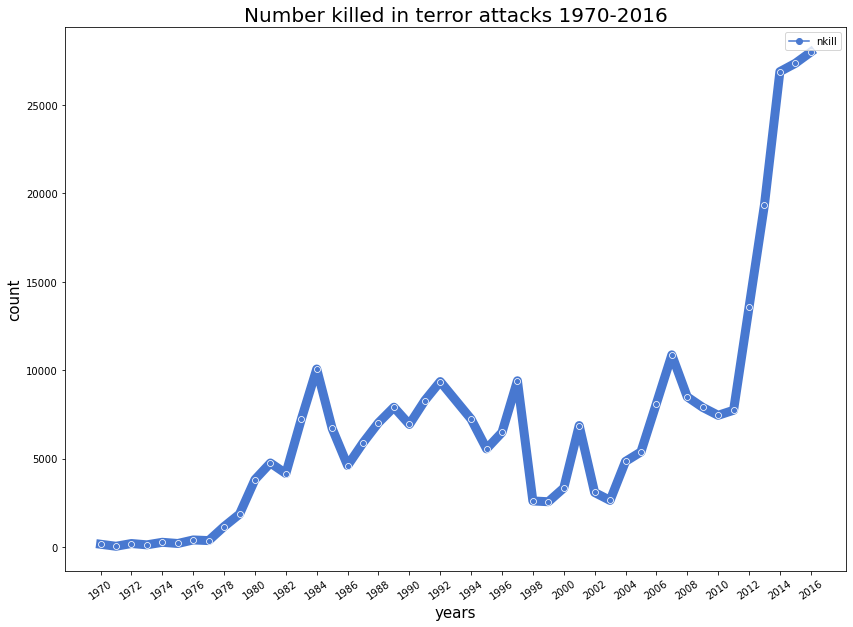

In [32]:
plt.figure(figsize =(14,10))
sns.lineplot(data = nkill_year, markers=True, palette="muted", dashes=False, linewidth=9)
plt.title("Number killed in terror attacks 1970-2016", fontsize = 20)
plt.xlabel("years", fontsize=15)
plt.xticks(np.arange(1970, 2018, step=2), rotation=35)
plt.ylabel("count", fontsize= 15)
plt.show()

In [33]:
ishostkid_year = gt1.groupby(["year"]).ishostkid.sum()
ishostkid_year = ishostkid_year.fillna(0)

ishostkid_year

year
1970     46.0
1971     19.0
1972     20.0
1973     43.0
1974     39.0
1975     30.0
1976     40.0
1977     76.0
1978    108.0
1979    154.0
1980    136.0
1981    114.0
1982    107.0
1983    104.0
1984    113.0
1985    153.0
1986    106.0
1987    108.0
1988    117.0
1989    158.0
1990    172.0
1991    214.0
1992    193.0
1994    213.0
1995    165.0
1996    163.0
1997    302.0
1998     45.0
1999    127.0
2000    142.0
2001    164.0
2002     77.0
2003     59.0
2004     76.0
2005    109.0
2006    170.0
2007    218.0
2008    406.0
2009    352.0
2010    449.0
2011    384.0
2012    252.0
2013    427.0
2014    851.0
2015    747.0
2016    670.0
Name: ishostkid, dtype: float64

In [34]:
ishostkid_year = ishostkid_year.to_frame()
ishostkid_year.head()

,ishostkid
year,
1970,46.0
1971,19.0
1972,20.0
1973,43.0
1974,39.0


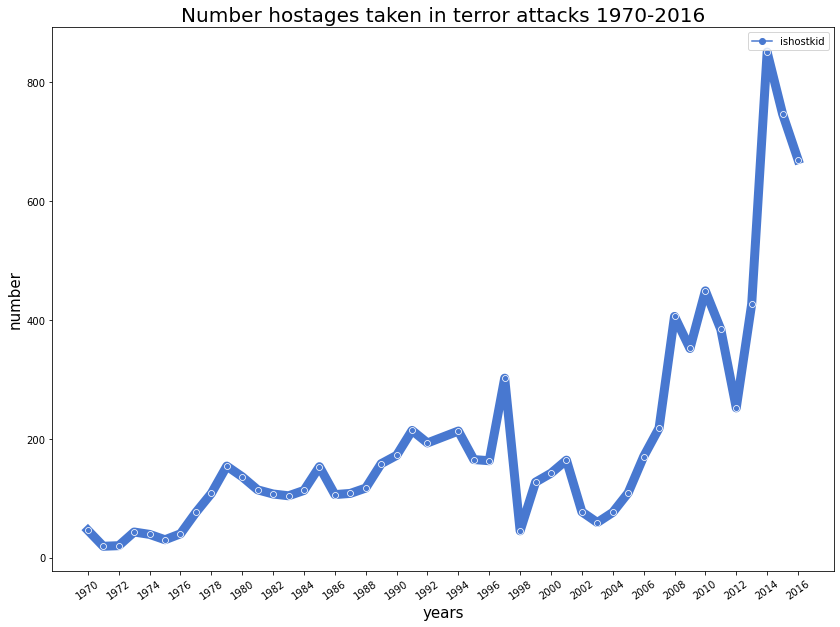

In [35]:
plt.figure(figsize =(14,10))
sns.lineplot(data = ishostkid_year, markers=True, palette="muted", dashes=False, linewidth=9)
plt.title("Number hostages taken in terror attacks 1970-2016", fontsize = 20)
plt.xlabel("years", fontsize=15)
plt.xticks(np.arange(1970, 2018, step=2), rotation=35)
plt.ylabel("number", fontsize= 15)
plt.show()

In [36]:
host_killed = pd.merge(ishostkid_year, nkill_year, on = "year")

In [37]:
host_killed.head()

,ishostkid,nkill
year,,
1970,46.0,152.0
1971,19.0,37.0
1972,20.0,193.0
1973,43.0,118.0
1974,39.0,262.0


In [38]:
host_killed["Ratio_host_kill"] = (host_killed["ishostkid"]/ host_killed["nkill"])

In [39]:
host_killed.head()

,ishostkid,nkill,Ratio_host_kill
year,,,
1970,46.0,152.0,0.302632
1971,19.0,37.0,0.513514
1972,20.0,193.0,0.103627
1973,43.0,118.0,0.364407
1974,39.0,262.0,0.148855


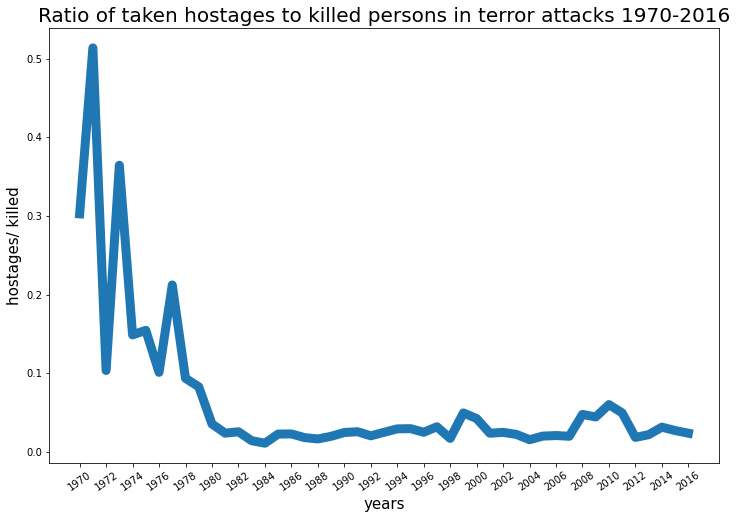

In [110]:
plt.figure(figsize =(12,8))
sns.lineplot(data = host_killed["Ratio_host_kill"], markers=True, palette="muted", dashes=False, linewidth=9)
plt.title("Ratio of taken hostages to killed persons in terror attacks 1970-2016", fontsize = 20)
plt.xlabel("years", fontsize=15)
plt.xticks(np.arange(1970, 2018, step=2), rotation=35)
plt.ylabel("hostages/ killed", fontsize= 15)
plt.show()

In [41]:
attack_year = gt1.groupby(["year", "Country"]).Country.count().unstack().T
attack_year

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,...,296.0,396.0,484.0,492.0,389.0,1330.0,1251.0,1451.0,1494.0,1269.0
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,2.0,4.0,2.0
Algeria,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,121.0,104.0,101.0,96.0,14.0,40.0,21.0,12.0,15.0,9.0
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,...,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0
Argentina,15.0,6.0,8.0,49.0,42.0,23.0,43.0,12.0,18.0,14.0,...,NaN,NaN,1.0,5.0,1.0,2.0,2.0,NaN,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yemen,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,2.0,NaN,...,6.0,22.0,19.0,107.0,108.0,288.0,372.0,628.0,472.0,386.0
Yugoslavia,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zaire,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
attack_year = attack_year.fillna(0)
attack_year

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,296.0,396.0,484.0,492.0,389.0,1330.0,1251.0,1451.0,1494.0,1269.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,4.0,2.0
Algeria,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,121.0,104.0,101.0,96.0,14.0,40.0,21.0,12.0,15.0,9.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
Argentina,15.0,6.0,8.0,49.0,42.0,23.0,43.0,12.0,18.0,14.0,...,0.0,0.0,1.0,5.0,1.0,2.0,2.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yemen,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,...,6.0,22.0,19.0,107.0,108.0,288.0,372.0,628.0,472.0,386.0
Yugoslavia,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zaire,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Attacks per year and country

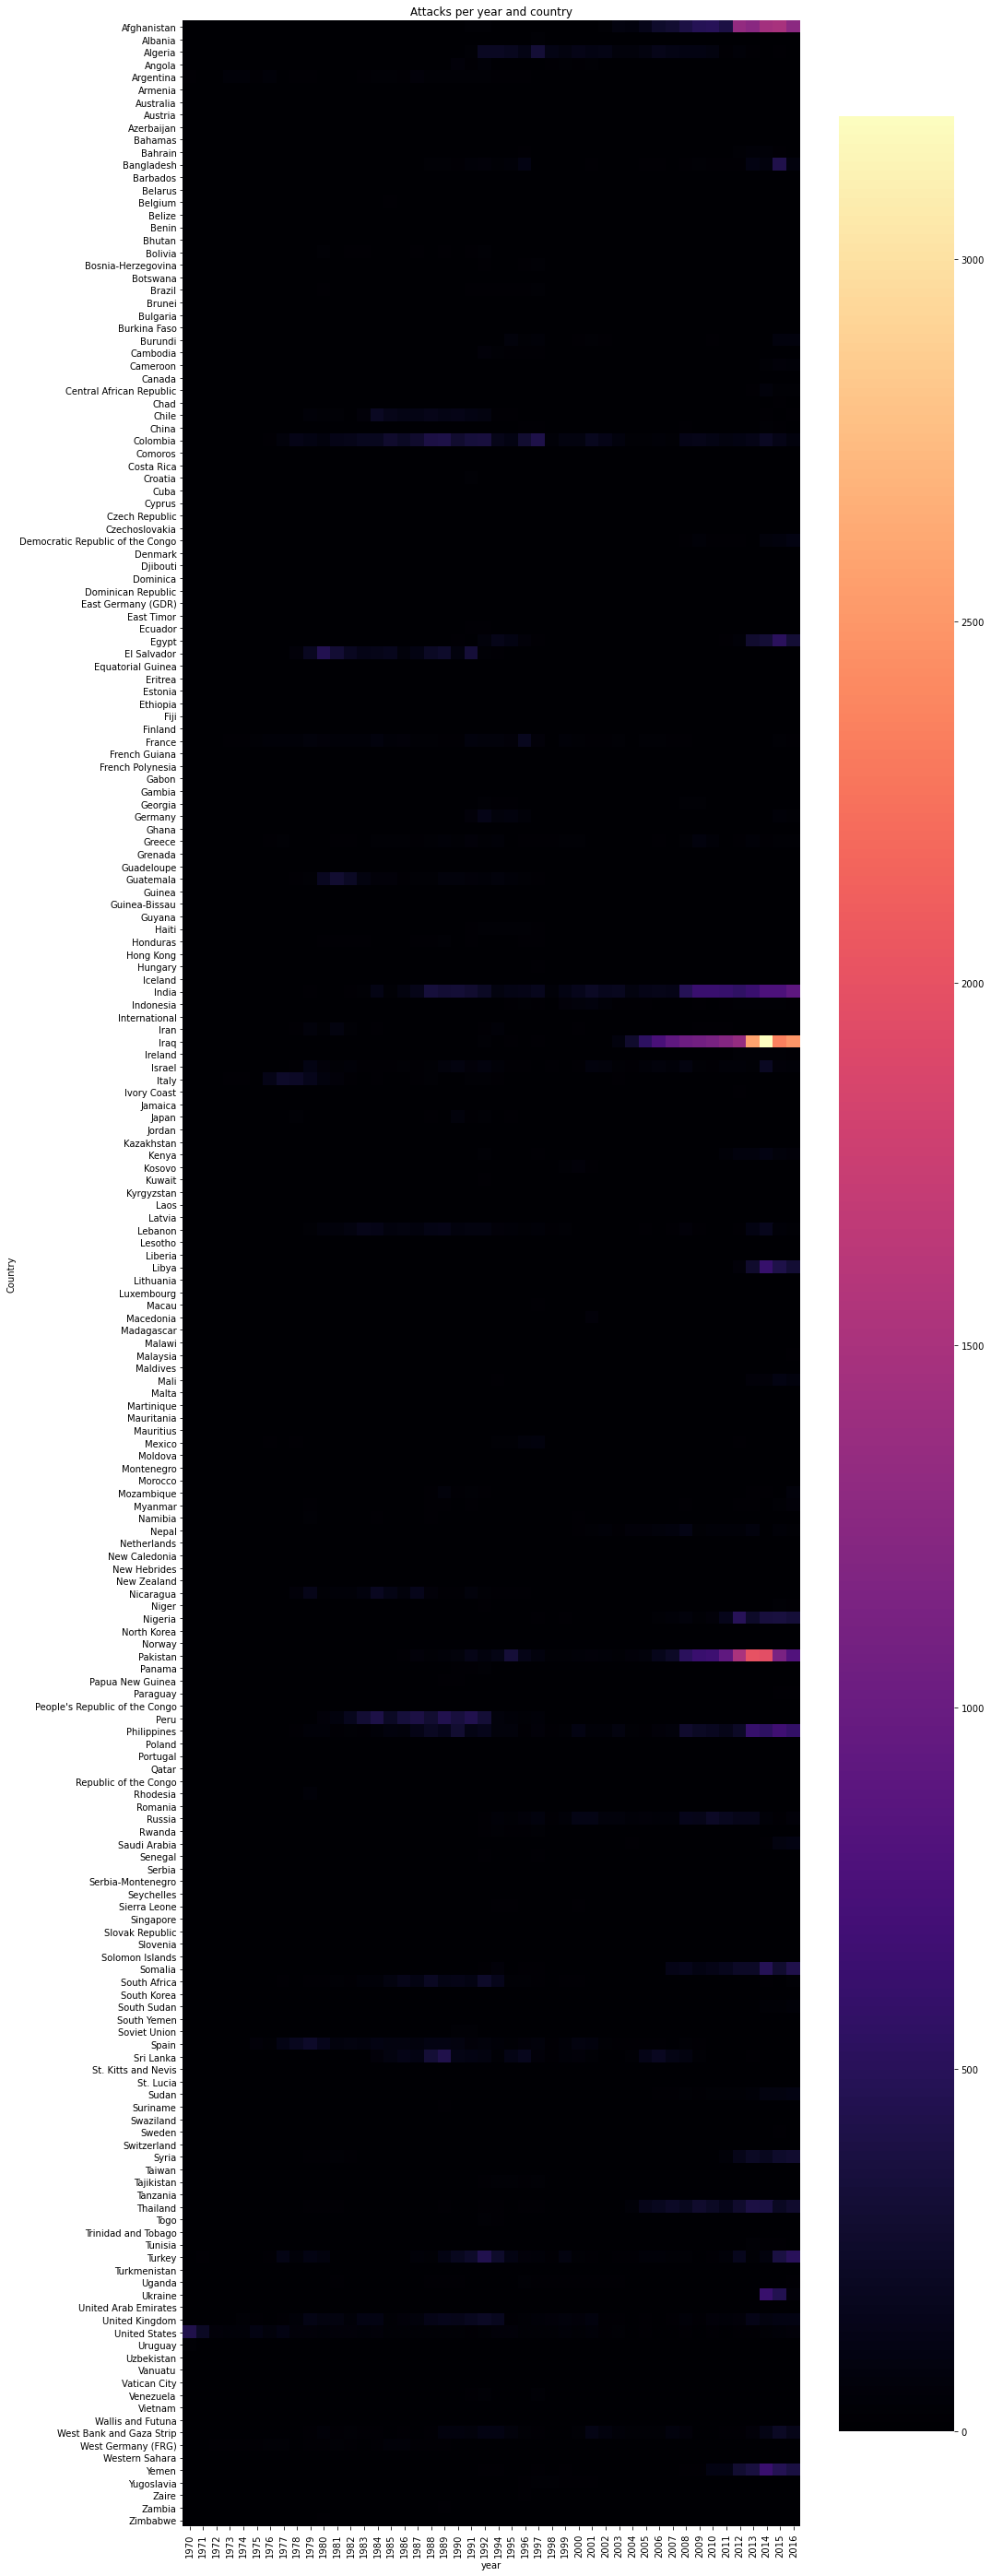

In [43]:
fig, ax = plt.subplots(figsize = (15,50))

sns.heatmap(attack_year, cmap="magma", annot = False)
plt.title("Attacks per year and country")

plt.show()

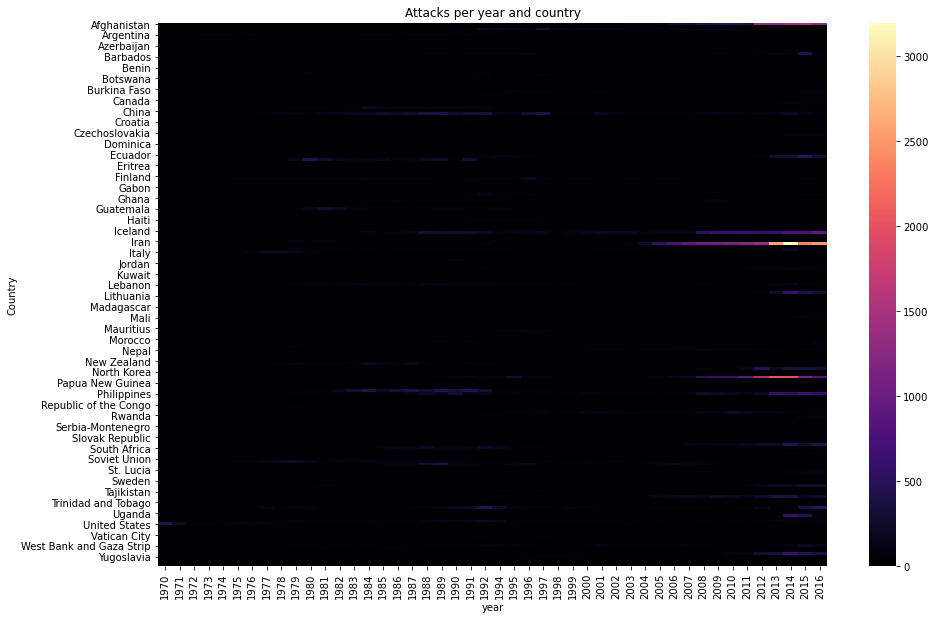

In [44]:
fig, ax = plt.subplots(figsize = (15,10))

sns.heatmap(attack_year, cmap="magma", annot = False)
plt.title("Attacks per year and country")
plt.show()

In [45]:
# 1979-1987 USSR intervention in Afganistan
# 2003 US invasion of Iraq, new wave began

# bombing of Libya 2011
# intifada 1987 to 1993

#Civil war in Syria 2011-

## Deployed weapons

In [46]:
weapon_year = gt1.groupby(["year", "weapon"]).weapon.count().unstack()
weapon_year = weapon_year.fillna(0)
weapon_year.head(10)

weapon,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,Vehicle
year,,,,,,,,,,,,
1970,0.0,3.0,294.0,1.0,60.0,156.0,2.0,0.0,0.0,1.0,44.0,1.0
1971,0.0,1.0,170.0,0.0,38.0,73.0,2.0,0.0,0.0,0.0,19.0,0.0
1972,0.0,0.0,94.0,1.0,27.0,14.0,0.0,0.0,0.0,0.0,17.0,0.0
1973,0.0,3.0,91.0,0.0,55.0,35.0,3.0,0.0,0.0,0.0,37.0,0.0
1974,0.0,1.0,171.0,1.0,48.0,27.0,1.0,0.0,1.0,0.0,29.0,0.0
1975,0.0,3.0,222.0,0.0,78.0,25.0,0.0,0.0,0.0,0.0,25.0,0.0
1976,0.0,2.0,252.0,0.0,134.0,105.0,1.0,1.0,0.0,0.0,37.0,0.0
1977,0.0,2.0,464.0,0.0,212.0,166.0,6.0,0.0,0.0,0.0,65.0,0.0
1978,0.0,9.0,458.0,0.0,353.0,174.0,14.0,0.0,0.0,2.0,112.0,0.0


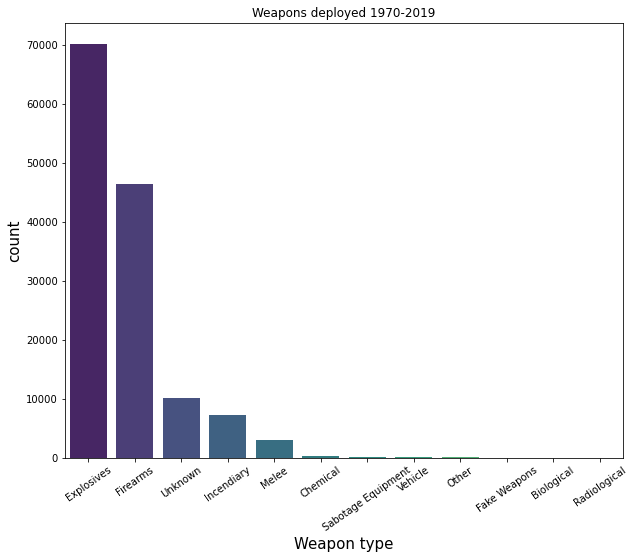

In [47]:
plt.figure(figsize = (10,8))
sns.countplot(x="weapon", data = gt1, palette = "viridis", order= gt1.weapon.value_counts().index)
plt.title("Weapons deployed 1970-2019")
plt.xlabel("Weapon type", fontsize=15)
plt.ylabel("count", fontsize= 15)
plt.xticks(rotation=35)
plt.show()

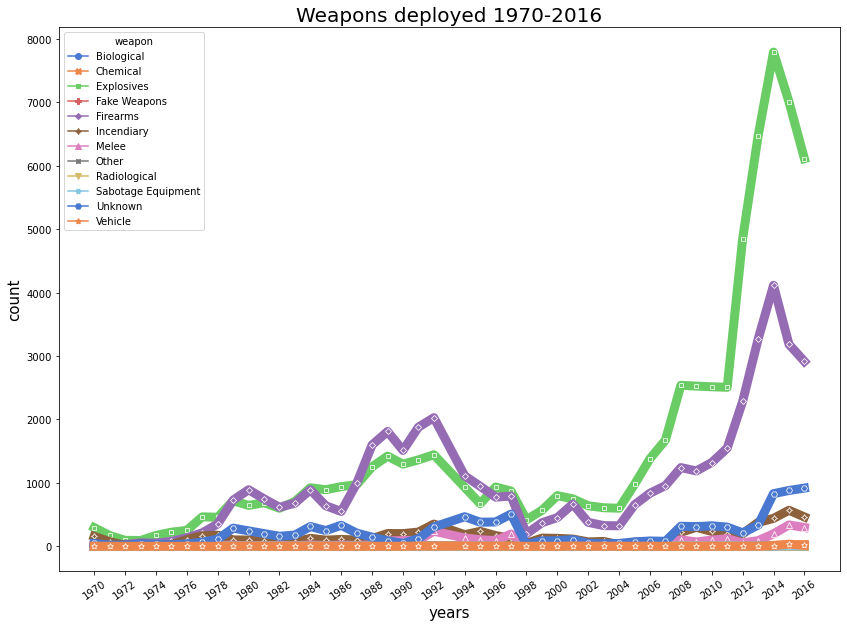

In [48]:
plt.figure(figsize =(14,10))
sns.lineplot(data = weapon_year, markers=True, palette="muted", dashes=False, linewidth=9)
plt.title("Weapons deployed 1970-2016", fontsize = 20)
plt.xlabel("years", fontsize=15)
plt.xticks(np.arange(1970, 2018, step=2), rotation=35)
plt.ylabel("count", fontsize= 15)
plt.show()

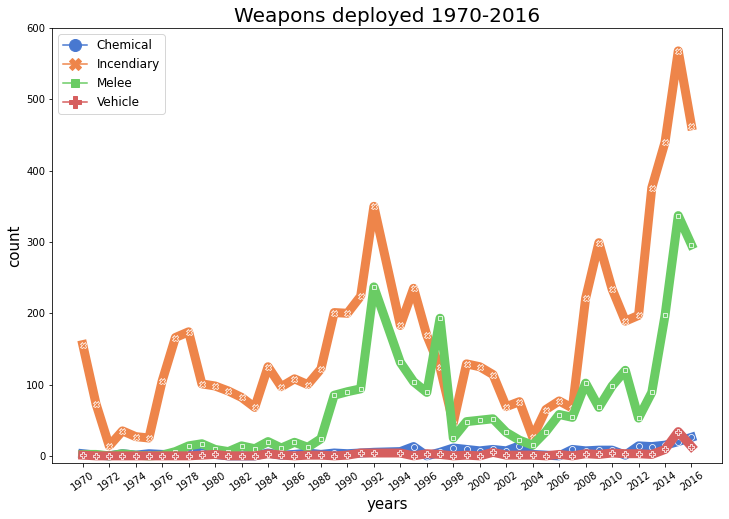

In [111]:
plt.figure(figsize =(12,8))
sns.lineplot(data = weapon_year[["Chemical", "Incendiary", "Melee", "Vehicle"]], markers=True, palette="muted", dashes=False, linewidth=9)
plt.title("Weapons deployed 1970-2016", fontsize = 20)
plt.xlabel("years", fontsize=15)
plt.legend(markerscale = 2, fontsize = 12)
plt.ylim(-10, 600)
plt.xticks(np.arange(1970, 2018, step=2), rotation=35)
plt.ylabel("count", fontsize= 15)


plt.show()

In [50]:
target_year = gt1.groupby(["year", "target"]).target.count().unstack()
target_year = target_year.fillna(0)
target_year.head(10)

target,Abortion Related,Airports & Aircraft,Business,Diplomats,Educational Institution,Food or Water Supply,Government,Journalists & Media,Maritime,Military,...,Police,Political Party,Private Citizens & Property,Religious Figures/Institutions,Telecommunication,Terrorists,Tourists,Transportation,Unknown,Utilities
year,,,,,,,,,,,,,,,,,,,,,
1970,0.0,21.0,107.0,46.0,61.0,2.0,69.0,7.0,0.0,83.0,...,71.0,1.0,46.0,11.0,6.0,2.0,1.0,2.0,4.0,13.0
1971,0.0,7.0,85.0,29.0,32.0,0.0,36.0,9.0,1.0,48.0,...,22.0,2.0,11.0,3.0,2.0,0.0,3.0,2.0,0.0,10.0
1972,0.0,20.0,37.0,21.0,6.0,0.0,6.0,4.0,1.0,20.0,...,8.0,1.0,18.0,0.0,0.0,0.0,4.0,1.0,0.0,6.0
1973,0.0,18.0,51.0,50.0,4.0,0.0,17.0,3.0,2.0,24.0,...,15.0,0.0,27.0,2.0,0.0,2.0,0.0,1.0,0.0,4.0
1974,0.0,18.0,101.0,48.0,1.0,0.0,26.0,9.0,2.0,16.0,...,15.0,0.0,25.0,6.0,3.0,2.0,0.0,3.0,1.0,2.0
1975,0.0,14.0,94.0,62.0,2.0,1.0,46.0,11.0,3.0,22.0,...,31.0,3.0,23.0,2.0,3.0,0.0,4.0,18.0,1.0,12.0
1976,0.0,36.0,139.0,93.0,12.0,0.0,78.0,14.0,4.0,35.0,...,47.0,8.0,33.0,7.0,0.0,3.0,1.0,11.0,3.0,6.0
1977,4.0,28.0,279.0,58.0,19.0,1.0,133.0,43.0,1.0,36.0,...,84.0,9.0,120.0,6.0,11.0,5.0,4.0,36.0,6.0,31.0
1978,5.0,24.0,286.0,57.0,34.0,7.0,201.0,42.0,2.0,68.0,...,175.0,13.0,101.0,12.0,11.0,14.0,4.0,32.0,8.0,20.0


## Attacked targets

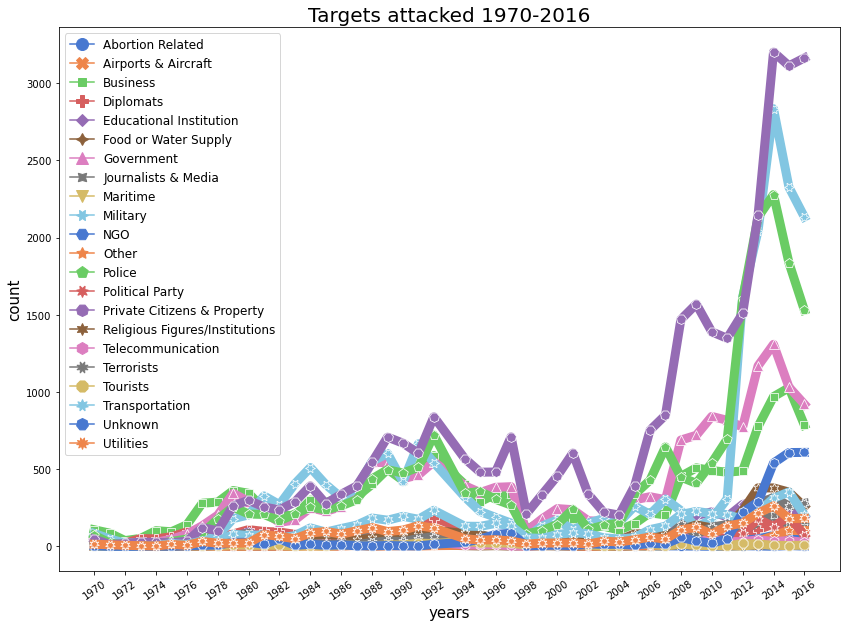

In [51]:
plt.figure(figsize =(14,10))
sns.lineplot(data = target_year, markers=True, palette="muted", dashes=False, linewidth=9, markersize= 10)
plt.title("Targets attacked 1970-2016", fontsize = 20)
plt.xlabel("years", fontsize=15)
plt.legend(markerscale = 2, fontsize = 12)
plt.xticks(np.arange(1970, 2018, step=2), rotation=35)
plt.ylabel("count", fontsize= 15)
plt.show()

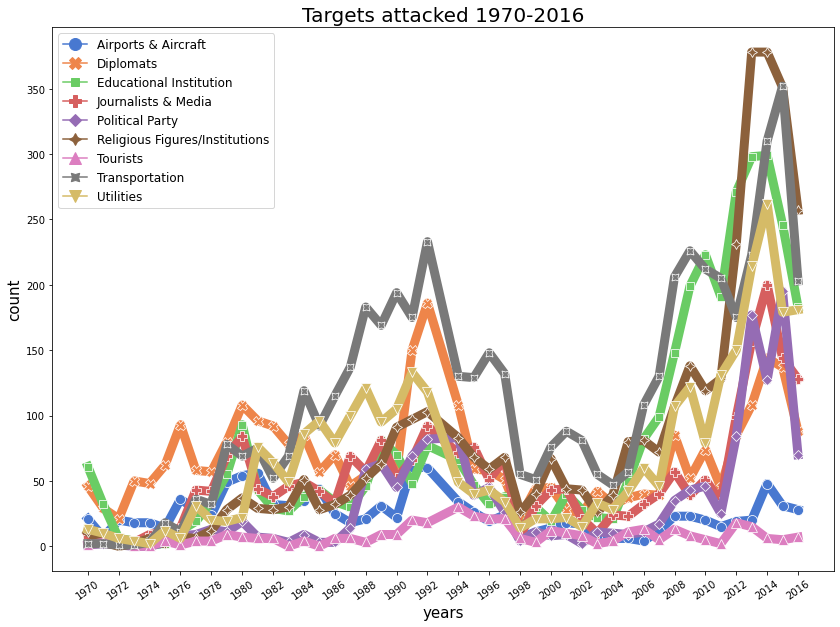

In [52]:
plt.figure(figsize =(14,10))
sns.lineplot(data = target_year[["Airports & Aircraft", "Diplomats", "Educational Institution", 
                                 "Journalists & Media", "Political Party", "Religious Figures/Institutions", "Tourists", 
                                 "Transportation", "Utilities"]], markers=True, palette="muted", dashes=False, linewidth=9, markersize= 10)
plt.title("Targets attacked 1970-2016", fontsize = 20)
plt.xlabel("years", fontsize=15)
plt.legend(markerscale = 2, fontsize = 12)
plt.xticks(np.arange(1970, 2018, step=2), rotation=35)
plt.ylabel("count", fontsize= 15)
plt.show()

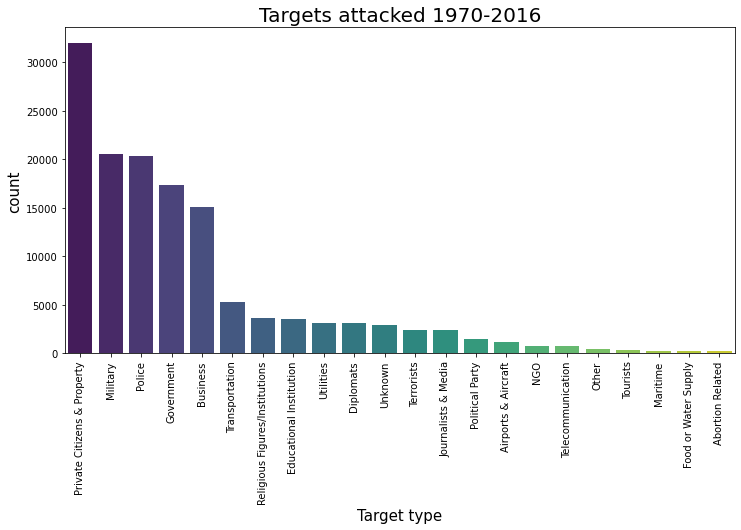

In [115]:
plt.figure(figsize = (12,6))
sns.countplot(x="target", data = gt1, palette = "viridis", order= gt1.target.value_counts().index)
plt.title("Targets attacked 1970-2016", fontsize = 20)
plt.xlabel("Target type", fontsize=15)
plt.ylabel("count", fontsize= 15)
plt.xticks(rotation=90, fontsize = 10)
plt.show()

# GDP data set

In [54]:
gdp = pd.read_csv("tab_gdp.csv")
gdp

,Country,GDP_per_cap
0,Afghanistan,700.0
1,Albania,4500.0
2,Algeria,6000.0
3,American Samoa,8000.0
4,Andorra,19000.0
...,...,...
221,Wallis and Futuna,3700.0
222,West Bank,800.0
223,Yemen,800.0
224,Zambia,800.0


# Weapons exporters data set

In [55]:
weap_exp = pd.read_csv("tab_w_exp.csv")
weap_exp

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Argentina,0.0,0.0,11.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Armenia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,Yugoslavia,3.0,23.0,0.0,35.0,0.0,14.0,41.0,75.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130,Zambia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131,Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
col_names = [str(i) for i in range(1970, 2020)]

In [57]:
col_names

['1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

In [58]:
test_weap = weap_exp.copy()

In [59]:
weap_test_new = test_weap.melt(id_vars = "Country", value_vars = ['1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019'])

In [60]:
weap_test_new

,Country,variable,value
0,Albania,1970,0.0
1,Algeria,1970,0.0
2,Angola,1970,0.0
3,Argentina,1970,0.0
4,Armenia,1970,0.0
...,...,...,...
6695,Yugoslavia,2019,0.0
6696,Zambia,2019,0.0
6697,Zimbabwe,2019,0.0
6698,0,2019,0.0


In [61]:
weap_test_new.rename(columns={"variable":"year", "value": "weap_exp" }, inplace=True)

In [62]:
weap_test_new

,Country,year,weap_exp
0,Albania,1970,0.0
1,Algeria,1970,0.0
2,Angola,1970,0.0
3,Argentina,1970,0.0
4,Armenia,1970,0.0
...,...,...,...
6695,Yugoslavia,2019,0.0
6696,Zambia,2019,0.0
6697,Zimbabwe,2019,0.0
6698,0,2019,0.0


In [63]:
weap_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   6700 non-null   object 
 1   year      6700 non-null   object 
 2   weap_exp  6700 non-null   float64
dtypes: float64(1), object(2)
memory usage: 157.2+ KB


In [64]:
gt1.head()

,year,imonth,iday,Country,success,suicide,method,target,natlty1_txt,gname,weapon,nkill,nwound,ishostkid
0,1970,7,2,Dominican Republic,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Unknown,1.0,0.0,0.0
1,1970,1,1,Mexico,1,0,Hostage Taking,Diplomats,Belgium,23rd of September Communist League,Unknown,0.0,0.0,1.0
2,1970,1,1,Philippines,1,0,Assassination,Journalists & Media,United States,Unknown,Unknown,1.0,0.0,0.0
3,1970,1,1,United States,1,0,Armed Assault,Police,United States,Black Nationalists,Firearms,0.0,0.0,0.0
4,1970,1,2,Uruguay,0,0,Assassination,Police,Uruguay,Tupamaros (Uruguay),Firearms,0.0,0.0,0.0


In [65]:
test_att = gt1.groupby(["Country", "year"]).Country.count()
test_att

Country      year
Afghanistan  1973     1
             1979     2
             1987     1
             1988    11
             1989    10
                     ..
Zimbabwe     2008     5
             2010     1
             2011     1
             2013     3
             2014     1
Name: Country, Length: 3557, dtype: int64

In [66]:
test_att = test_att.to_frame()

In [67]:
test_att

Country
Country     year         
Afghanistan 1973        1
            1979        2
            1987        1
            1988       11
            1989       10
...                   ...
Zimbabwe    2008        5
            2010        1
            2011        1
            2013        3
            2014        1

[3557 rows x 1 columns]

In [68]:
test_att.rename(columns={"Country":"Attack", }, inplace=True)

In [69]:
test_att

Attack
Country     year        
Afghanistan 1973       1
            1979       2
            1987       1
            1988      11
            1989      10
...                  ...
Zimbabwe    2008       5
            2010       1
            2011       1
            2013       3
            2014       1

[3557 rows x 1 columns]

In [70]:
test_att.shape

(3557, 1)

In [71]:
test_att = test_att.reset_index()

In [72]:
test_att.head(50)

,Country,year,Attack
0,Afghanistan,1973,1
1,Afghanistan,1979,2
2,Afghanistan,1987,1
3,Afghanistan,1988,11
4,Afghanistan,1989,10
5,Afghanistan,1990,2
6,Afghanistan,1991,26
7,Afghanistan,1992,34
8,Afghanistan,1994,9
9,Afghanistan,1995,6


In [73]:
test_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3557 entries, 0 to 3556
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  3557 non-null   object
 1   year     3557 non-null   int64 
 2   Attack   3557 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 83.5+ KB


In [74]:
weap_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   6700 non-null   object 
 1   year      6700 non-null   object 
 2   weap_exp  6700 non-null   float64
dtypes: float64(1), object(2)
memory usage: 157.2+ KB


In [75]:
weap_test_new

,Country,year,weap_exp
0,Albania,1970,0.0
1,Algeria,1970,0.0
2,Angola,1970,0.0
3,Argentina,1970,0.0
4,Armenia,1970,0.0
...,...,...,...
6695,Yugoslavia,2019,0.0
6696,Zambia,2019,0.0
6697,Zimbabwe,2019,0.0
6698,0,2019,0.0


In [76]:
weap_test_new['year'] = weap_test_new['year'].astype(str).astype(int)

In [77]:
weap_test_new

,Country,year,weap_exp
0,Albania,1970,0.0
1,Algeria,1970,0.0
2,Angola,1970,0.0
3,Argentina,1970,0.0
4,Armenia,1970,0.0
...,...,...,...
6695,Yugoslavia,2019,0.0
6696,Zambia,2019,0.0
6697,Zimbabwe,2019,0.0
6698,0,2019,0.0


In [78]:
weap_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   6700 non-null   object 
 1   year      6700 non-null   int32  
 2   weap_exp  6700 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 131.0+ KB


In [79]:
wexp_att_m = pd.merge(weap_test_new, test_att, on = ["Country", "year"])
wexp_att_m

,Country,year,weap_exp,Attack
0,Argentina,1970,0.0,15
1,Australia,1970,17.0,1
2,Belgium,1970,0.0,1
3,Brazil,1970,0.0,6
4,Canada,1970,196.0,2
...,...,...,...,...
2615,Ukraine,2016,486.0,53
2616,United Kingdom,2016,1376.0,100
2617,United States,2016,9855.0,58
2618,Uruguay,2016,0.0,1


In [80]:
wexp_year = wexp_att_m.groupby(["year"]).weap_exp.sum()
#wexp_year = nkill_year.fillna(0)

wexp_year.head()

year
1970    10559.0
1971    15301.0
1972    17551.0
1973    18359.0
1974    18340.0
Name: weap_exp, dtype: float64

In [81]:
wexp_year = wexp_year.to_frame()
wexp_year.head()

,weap_exp
year,
1970,10559.0
1971,15301.0
1972,17551.0
1973,18359.0
1974,18340.0


In [82]:
tot_att_year = wexp_att_m.groupby(["year"]).Attack.sum()
tot_att_year.head()

year
1970    549
1971    302
1972    134
1973    201
1974    253
Name: Attack, dtype: int64

In [83]:
tot_att_year = tot_att_year.to_frame()
tot_att_year.head()

,Attack
year,
1970,549
1971,302
1972,134
1973,201
1974,253


In [84]:
wexp_att_year = pd.merge(wexp_year, tot_att_year, on = ["year"])


In [85]:
wexp_att_year.head()

,weap_exp,Attack
year,,
1970,10559.0,549
1971,15301.0,302
1972,17551.0,134
1973,18359.0,201
1974,18340.0,253


In [86]:
wexp_att_year.corr()

,weap_exp,Attack
weap_exp,1.000000,0.430266
Attack,0.430266,1.000000


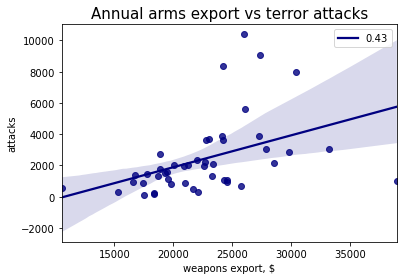

In [87]:
import seaborn as sns 
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(wexp_att_year["weap_exp"],wexp_att_year["Attack"])

ax = sns.regplot(x="weap_exp", y="Attack", data=wexp_att_year, color='navy', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

ax.set_title("Annual arms export vs terror attacks", fontsize = 15)
ax.legend({round(r_value, 2)})
plt.xlabel("weapons export, $")
plt.ylabel("attacks")

#ax.text(0.85, 0.85,'Text Here', fontsize=9)
plt.show()

# The most dangerous day of a month

In [88]:
gt1.head()

,year,imonth,iday,Country,success,suicide,method,target,natlty1_txt,gname,weapon,nkill,nwound,ishostkid
0,1970,7,2,Dominican Republic,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Unknown,1.0,0.0,0.0
1,1970,1,1,Mexico,1,0,Hostage Taking,Diplomats,Belgium,23rd of September Communist League,Unknown,0.0,0.0,1.0
2,1970,1,1,Philippines,1,0,Assassination,Journalists & Media,United States,Unknown,Unknown,1.0,0.0,0.0
3,1970,1,1,United States,1,0,Armed Assault,Police,United States,Black Nationalists,Firearms,0.0,0.0,0.0
4,1970,1,2,Uruguay,0,0,Assassination,Police,Uruguay,Tupamaros (Uruguay),Firearms,0.0,0.0,0.0


In [89]:
months = gt1.groupby("imonth").Country.count()

In [90]:
months = months.to_frame()
months.reset_index(inplace = True)
months

,imonth,Country
0,1,11322
1,2,10443
2,3,11447
3,4,11624
4,5,12445
5,6,11578
6,7,12321
7,8,12080
8,9,10656
9,10,11807


In [91]:
months.rename(columns={"Country": "Attacks"}, inplace = True)
months

,imonth,Attacks
0,1,11322
1,2,10443
2,3,11447
3,4,11624
4,5,12445
5,6,11578
6,7,12321
7,8,12080
8,9,10656
9,10,11807


In [99]:
days = gt1.groupby("iday").Country.count()
days

iday
1     5337
2     4500
3     4590
4     4640
5     4490
6     4478
7     4565
8     4510
9     4562
10    4547
11    4616
12    4588
13    4560
14    4549
15    4845
16    4541
17    4481
18    4442
19    4496
20    4459
21    4390
22    4390
23    4418
24    4377
25    4484
26    4392
27    4494
28    4475
29    4108
30    3871
31    2363
Name: Country, dtype: int64

In [100]:
days = days.to_frame()
days.reset_index(inplace = True)
days

,iday,Country
0,1,5337
1,2,4500
2,3,4590
3,4,4640
4,5,4490
5,6,4478
6,7,4565
7,8,4510
8,9,4562
9,10,4547


In [101]:
days.rename(columns={"Country": "Attacks"}, inplace = True)

In [102]:
days

,iday,Attacks
0,1,5337
1,2,4500
2,3,4590
3,4,4640
4,5,4490
5,6,4478
6,7,4565
7,8,4510
8,9,4562
9,10,4547


In [103]:
days = days.set_index("iday")
days.head()

,Attacks
iday,
1,5337
2,4500
3,4590
4,4640
5,4490


In [104]:
days.mean()

Attacks    4437.354839
dtype: float64

In [106]:
days.median()

Attacks    4494.0
dtype: float64

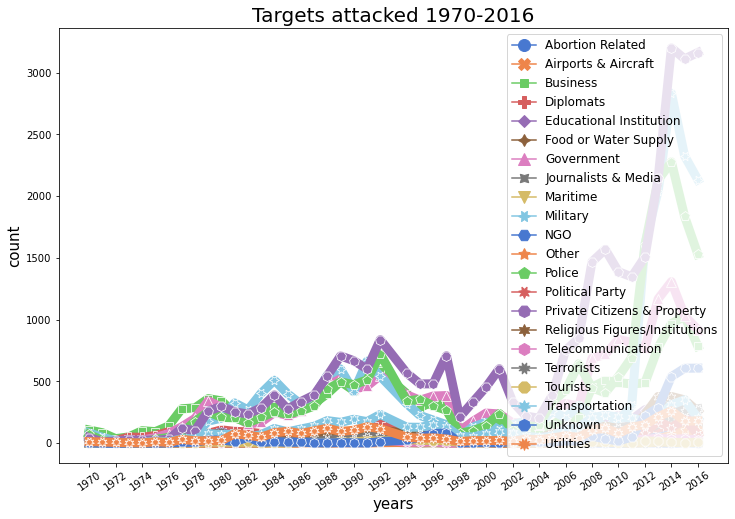

In [130]:
plt.figure(figsize =(12,8))
sns.lineplot(data = target_year, markers=True, palette="muted", dashes=False, linewidth=9, markersize= 10)
plt.title("Targets attacked 1970-2016", fontsize = 20)
plt.xlabel("years", fontsize=15)
plt.legend(markerscale = 2, fontsize = 12)
plt.xticks(np.arange(1970, 2018, step=2), rotation=35)
plt.ylabel("count", fontsize= 15)
plt.show()

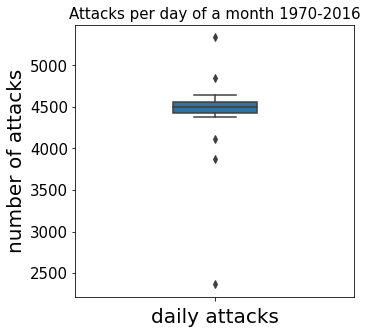

In [135]:
plt.figure(figsize = (5,5))
sns.boxplot(data = days, y = "Attacks", width=0.3)
plt.title("Attacks per day of a month 1970-2016", fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel("number of attacks", fontsize= 20)
plt.xlabel("daily attacks", fontsize= 20)
plt.show()

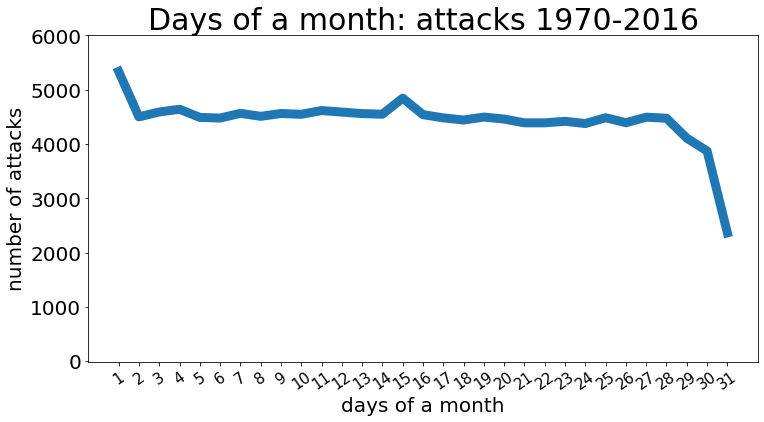

In [138]:
plt.figure(figsize =(12,6))
sns.lineplot(data = days.Attacks, markers=True, palette="muted", dashes=False, linewidth=9, markersize= 10)
plt.title("Days of a month: attacks 1970-2016", fontsize = 30)
plt.xlabel("days of a month", fontsize=20)
#plt.legend(markerscale = 2, fontsize = 12)
plt.xticks(np.arange(1, 32, step=1), fontsize = 15, rotation=35)
plt.yticks(fontsize = 20)
plt.ylim(-10, 6000)
plt.ylabel("number of attacks", fontsize= 20)
plt.show()